In [1]:
# Ria Patel - June 28, 2019
# Manipulates 2 qubits to become entangled

# Imports needed libraries/tools
import qiskit as qk
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute, Aer
from qiskit import IBMQ
from qiskit.tools.visualization import plot_histogram

# Used for mpl drawing at the end
style = {'backgroundcolor':'#FB7685'}

# Sets up the registers and the circuit
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)

{'00': 492, '01': 532}


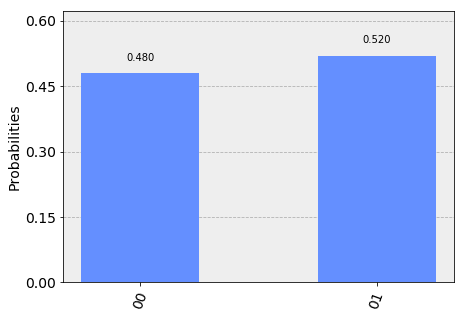

In [2]:
# Apply Hadamard Gate to 1st qubit & measure
qc.h(q[0])
qc.measure(q[0], c[0])
qc.measure(q[1], c[1])

# Simulates the circuit & plots histogram
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots=1024)
sim_result = job_sim.result()
measurement_result = sim_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result)

{'00': 496, '11': 528}


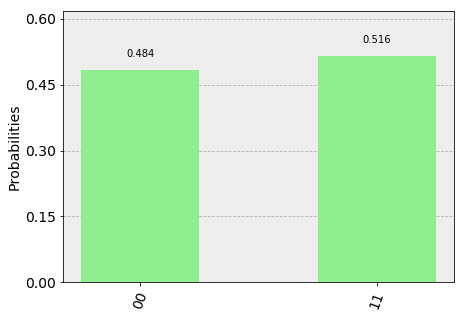

In [3]:
qc.barrier(q)

# Apply CX-gate from 1st qubit (control) to 2nd qubit (target) & measure
qc.cx(q[0], q[1])
qc.measure(q[0], c[0])
qc.measure(q[1], c[1])

# Simulates the circuit & plots histogram
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots=1024)
sim_result = job_sim.result()
measurement_result = sim_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result, color = 'lightgreen')

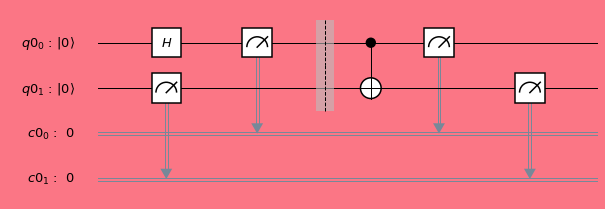

In [4]:
qc.draw(output='mpl', style=style)